In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [5]:
mpg = pd.read_csv("mpg...csv")

In [8]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


In [7]:
mpg2 = pd.read_csv("mpg...csv",usecols=["mpg","weight","horsepower","origin","cylinders"])

In [20]:
mpg2.head(20)

,mpg,cylinders,horsepower,weight,origin
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA
5,15.0,8,198,4341,USA
6,14.0,8,220,4354,USA
7,14.0,8,215,4312,USA
8,14.0,8,225,4425,USA
9,15.0,8,190,3850,USA


### Exploratory Data Analysis


In [11]:
mpg2.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [15]:
mpg2.describe(include ="all")

,mpg,cylinders,horsepower,weight,origin
count,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,USA
freq,NaN,NaN,NaN,NaN,245
mean,23.445918,5.471939,104.469388,2977.584184,NaN
std,7.805007,1.705783,38.491160,849.402560,NaN
min,9.000000,3.000000,46.000000,1613.000000,NaN
25%,17.000000,4.000000,75.000000,2225.250000,NaN
50%,22.750000,4.000000,93.500000,2803.500000,NaN
75%,29.000000,8.000000,126.000000,3614.750000,NaN


In [19]:
pd.crosstab(index=mpg2["origin"],columns="count")

col_0,count
origin,
Asia,79
Europe,68
USA,245


In [23]:
pd.crosstab(index=mpg2["origin"],columns=mpg2["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
Asia,4,69,0,6,0
Europe,0,61,3,4,0
USA,0,69,0,73,103


In [29]:
mpg2.groupby("origin").describe()

mpg                                                       cylinders  \
        count       mean       std   min    25%   50%     75%   max     count   
origin                                                                          
Asia     79.0  30.450633  6.090048  18.0  25.70  31.6  34.050  46.6      79.0   
Europe   68.0  27.602941  6.580182  16.2  23.75  26.0  30.125  44.3      68.0   
USA     245.0  20.033469  6.440384   9.0  15.00  18.5  24.000  39.0     245.0   

                  ... horsepower        weight                           \
            mean  ...        75%    max  count         mean         std   
origin            ...                                                     
Asia    4.101266  ...       95.0  132.0   79.0  2221.227848  320.497248   
Europe  4.161765  ...       90.0  133.0   68.0  2433.470588  491.813867   
USA     6.277551  ...      150.0  230.0  245.0  3372.489796  795.346690   

                                                  
           min      25%     50%      75%     max  
origin                                            
Asia    1613.0  1985.00  2155.0  2412.50  2930.0  
Europe  1825.0  2071.75  2240.0  2803.75  3820.0  
USA     1800.0  2720.00  3381.0  4055.00  5140.0  

[3 rows x 32 columns]

In [32]:
mpg2.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


In [42]:
sns.displot(data=mpg2, x='mpg')

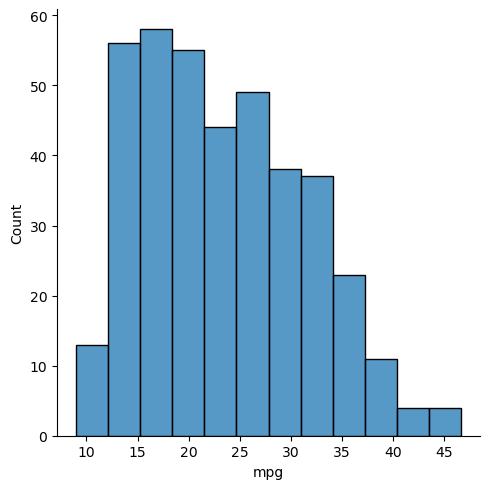

In [43]:
plt.show()

In [45]:
sns.boxplot(data=mpg2,x="origin",y="mpg",color="pink")

<AxesSubplot:xlabel='origin', ylabel='mpg'>

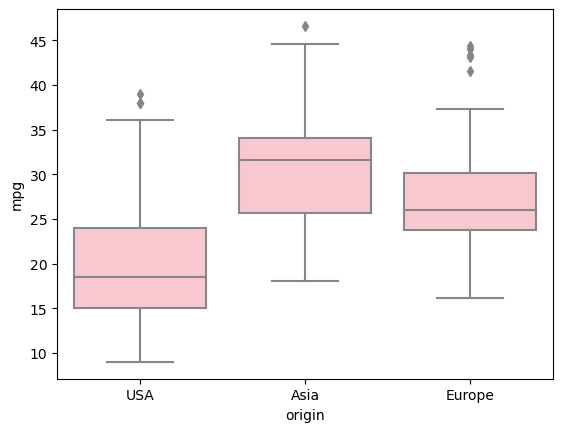

In [46]:
plt.show()

In [47]:
plt.gca().set_yticks([])

[]

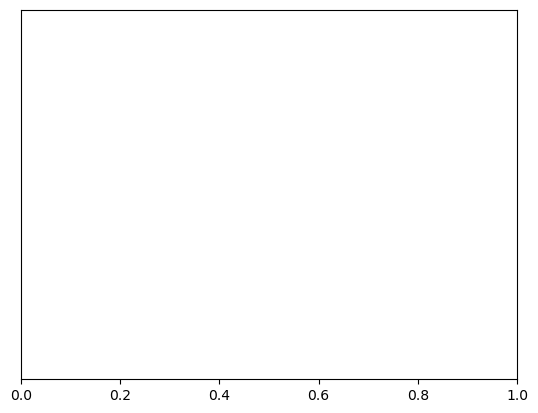

In [48]:
plt.show()

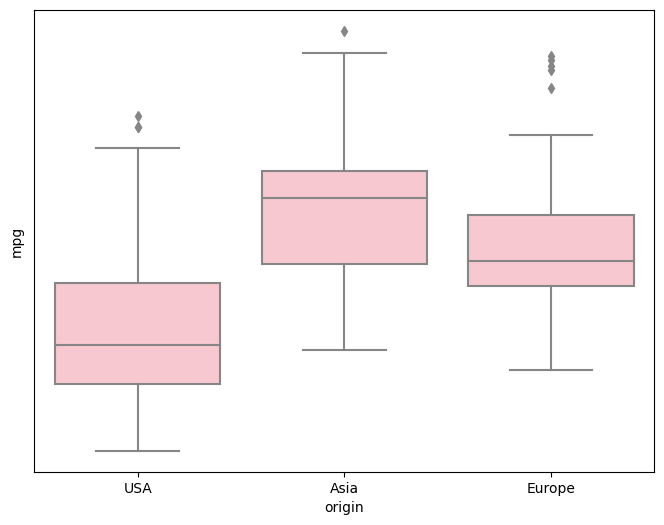

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(data=mpg2, x="origin", y="mpg", color="pink")
plt.gca().set_yticks([])
plt.show()

In [56]:
sns.displot(data=mpg2,x="mpg", col="origin")

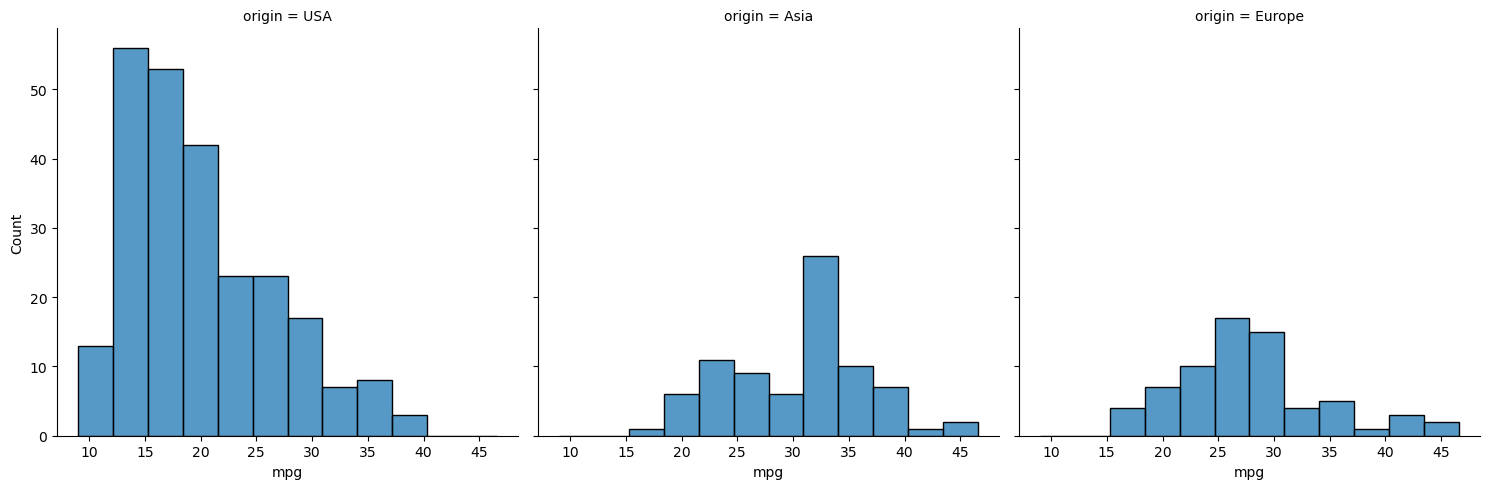

In [57]:
plt.show()

## Hypothesis Testing

In [64]:
usa_car =mpg2[mpg2["origin"]=='USA']

In [65]:
Europe_car =mpg2[mpg2["origin"]=="Europe"]

In [68]:
stats.ttest_ind(usa_car["mpg"],Europe_car["mpg"])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [74]:
mpg2[["mpg","horsepower","weight"]].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


In [71]:
Europe_car

,mpg,cylinders,horsepower,weight,origin
19,26.0,4,46,1835,Europe
20,25.0,4,87,2672,Europe
21,24.0,4,90,2430,Europe
22,25.0,4,95,2375,Europe
23,26.0,4,113,2234,Europe
...,...,...,...,...,...
349,33.0,4,74,2190,Europe
354,28.1,4,80,3230,Europe
355,30.7,6,76,3160,Europe
369,36.0,4,74,1980,Europe


In [75]:
sns.scatterplot(data=mpg2, x="weight", y="mpg")

<AxesSubplot:xlabel='weight', ylabel='mpg'>

In [76]:
plt.title("Relationship between Weight and Mileage")

Text(0.5, 1.0, 'Relationship between Weight and Mileage')

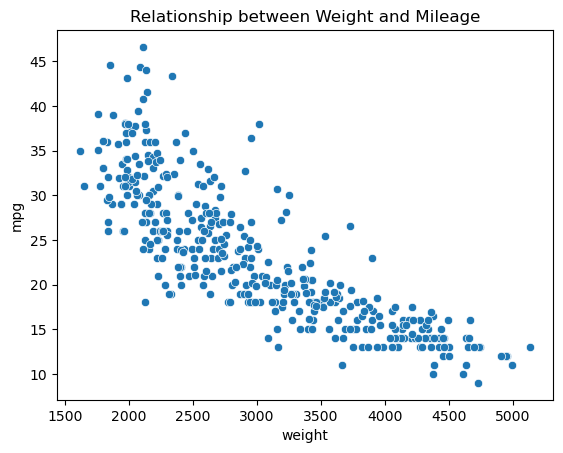

In [77]:
plt.show()

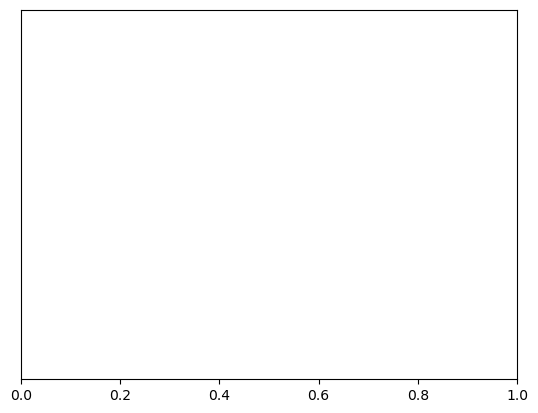

In [78]:
plt.gca().set_yticks([])
plt.show()

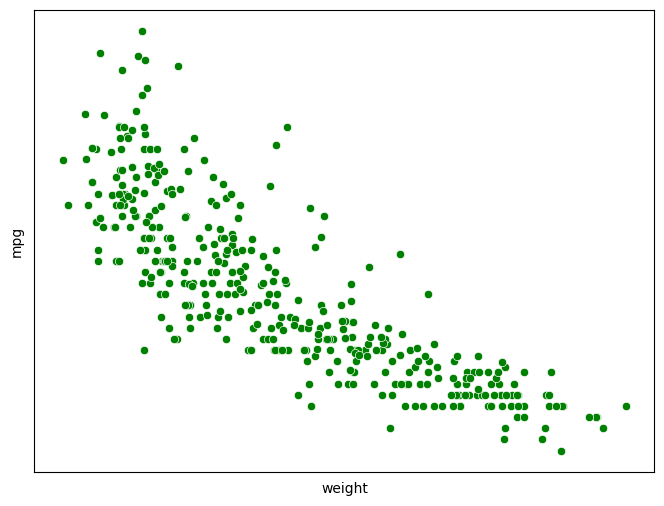

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mpg2, x="weight", y="mpg", color="green")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

In [86]:
sns.pairplot(mpg2[["mpg","horsepower","weight"]])

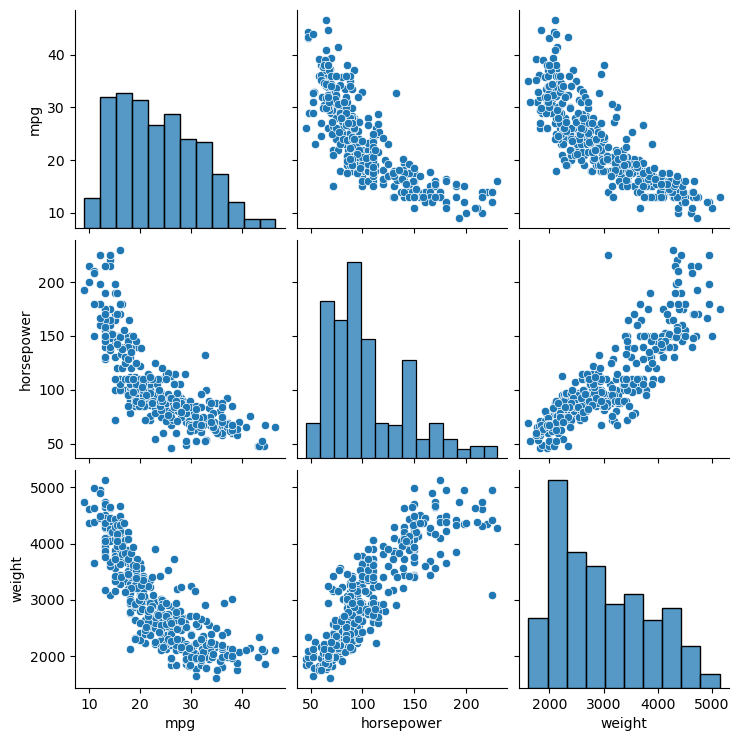

In [87]:
plt.show()

## Linear Regression


In [90]:
stats.linregress(x=mpg2["weight"],y=mpg2["mpg"])

LinregressResult(slope=-0.007647342535779578, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.0002579632782734318, intercept_stderr=0.7986724633128348)

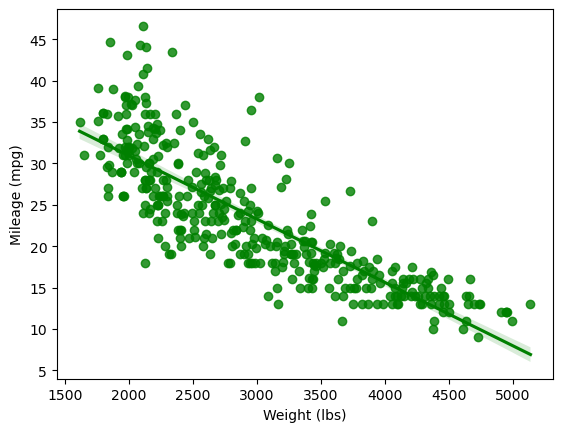

In [97]:
sns.regplot(data=mpg2, x="weight",y="mpg", color="Green")
plt.xlabel('Weight (lbs)')
plt.ylabel('Mileage (mpg)')
#plt.title('Relationship between weight and mileage')
plt.show()

In [99]:
X_train, X_test, y_train, y_test =model_selection.train_test_split(mpg2[['weight']], mpg2[['mpg']],
 random_state=1234)

In [106]:
y_train.shape

(294, 1)

In [107]:
y_test.shape

(98, 1)

In [109]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [111]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [112]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [113]:
# Print first five observations
y_pred[:5]

array([[14.86634263],
       [23.48793632],
       [26.2781699 ],
       [27.69989655],
       [29.05319785]])

In [114]:
regr.coef_

array([[-0.00760282]])

In [115]:
metrics.r2_score(y_test, y_pred)

0.6811923996681358

In [116]:
metrics.mean_squared_error(y_test, y_pred)

21.633480764366613